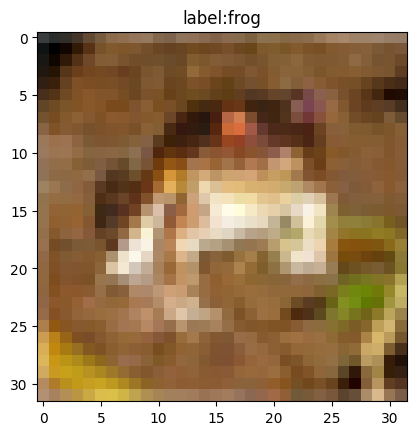

tensor([[[[-0.1921, -0.1232, -0.1534],
          [-0.1882, -0.1823, -0.1673],
          [ 0.0724, -0.0610,  0.0904]],

         [[ 0.1650, -0.1436,  0.1026],
          [-0.0123,  0.0679,  0.1367],
          [ 0.1231, -0.0116, -0.1875]],

         [[-0.1325, -0.0666,  0.0794],
          [-0.1089, -0.0808, -0.0885],
          [-0.1576,  0.0010, -0.1858]]],


        [[[ 0.0912,  0.0642,  0.0601],
          [ 0.1018, -0.1806, -0.1924],
          [ 0.0391,  0.1287,  0.1356]],

         [[-0.1457, -0.0107,  0.1449],
          [-0.0167, -0.1774,  0.1562],
          [ 0.1568, -0.1579, -0.0344]],

         [[-0.0273, -0.0557, -0.1448],
          [-0.1542,  0.1901,  0.1049],
          [-0.0042, -0.1841, -0.0306]]],


        [[[-0.1145,  0.0691, -0.1684],
          [-0.1182,  0.0753, -0.0879],
          [ 0.0165,  0.0848, -0.0629]],

         [[ 0.1599,  0.1349,  0.1017],
          [-0.1812, -0.1201, -0.1566],
          [ 0.1201, -0.0250,  0.1251]],

         [[ 0.0317, -0.1559,  0.1458],
     

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
# 定义 CNN 模型
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)  # 输入3通道，输出32通道
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # 输入32通道，输出64通道
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # 池化层
        self.fc1 = nn.Linear(64 * 8 * 8, 512)  # 全连接层，假设输入为32x32图像
        self.fc2 = nn.Linear(512, 10)  # 输出10类

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))  # 第一层卷积 + 激活 + 池化
        x = self.pool(nn.ReLU()(self.conv2(x)))  # 第二层卷积 + 激活 + 池化
        x = x.view(-1, 64 * 8 * 8)  # 展平
        x = nn.ReLU()(self.fc1(x))  # 全连接层 + 激活
        x = self.fc2(x)  # 输出层
        return x

# 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),  # 转换为张量
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 标准化
])

# 加载 CIFAR-10 数据集
train_dataset = datasets.CIFAR10(root="./data/", train=True, transform=transform, download=False)
test_dataset = datasets.CIFAR10(root="./data/", train=False, transform=transform, download=False)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# 输出图像
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')
def imshow(img):
    npimg=img.numpy().transpose(1,2,0)
    plt.imshow(npimg*0.5+0.5)
    plt.show()
img_index=0
img,label=train_dataset[img_index]
plt.title(f"label:{classes[label]}")
imshow(img)
print(SimpleCNN().conv1.weight.data)

# 初始化模型、损失函数和优化器
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# 训练模型
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # 清空梯度
        outputs = model(inputs)  # 前向传播
        loss = criterion(outputs, labels)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新权重

        running_loss += loss.item()
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')

# 测试模型
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%')
